## Taylor series of $sin(x)$

$$ sin(x) = \sum_{n=0}^{\infty} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$




Interact code in Sagemath for $sin(x)$

```python
# Interact Taylor Series of $$f(x) = sin(x)$$
# Explanatory example: Taylor Series – wiki.sagemath.org/interact https://wiki.sagemath.org/interact
x   = SR.var('x')
x0  = 0
f   = sin(x)
p   = plot(f, -10, 10, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([0 .. 20])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -10, 10, color='red', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-3, ymax=3)

```

Animate code in Sagemath for $sin(x)$
```python
# Animate  Taylor Series of $$f(x) = e^x$$
# MCS 320: Introduction to Symbolic Computation - Jan Verschelde, Mathematics, U. Illinois at Chicago  –
# http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec27.html#
x   = SR.var('x')
x0  = 0
f   = sin(x)
p   = plot(f, -10, 10, thickness=2,legend_label='f(x) = sin(x)')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -10,10, color='red', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-5, ymax=5)
a.show()
a.save('sin_of_x_taylor_animation_1.gif')
```

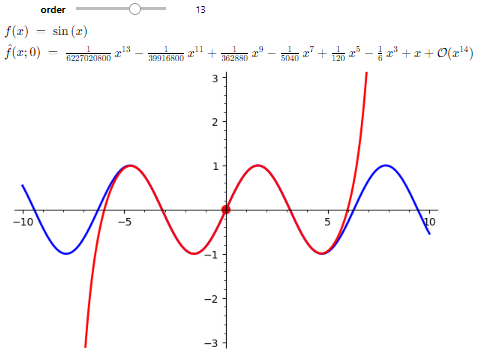

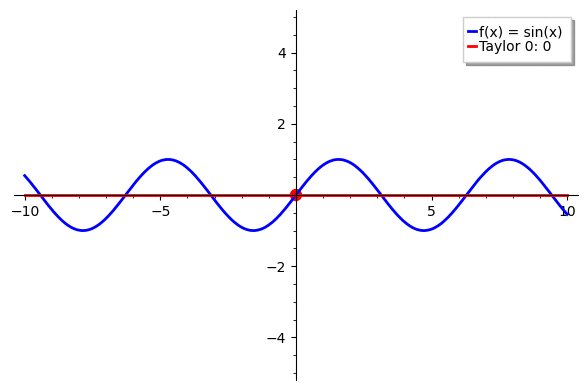

#What is value of the partial Taylor series of $sin(x)$ up to the  $10$-th term of $sin(x)$ about $0$ (Maclaurin  series) for $x=2$

$$ sin(x) \approx \sum_{i=0}^∞ (-1)^n \frac{x^2i+1}{(2i+1)!}  = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} ... $$


In [ ]:
# ∑_{i=0}^n  (-1)^i*(x^(2i+1))/((2i+1)!)

import math

n = 10
x = 2
sin_x = 0

for i in range(n+1):
    sin_x += ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
    print(i, 'sin_x ≈ ∑_{i=0}^'+str(i),'(-1)^i*(x^(2i+1))/((2i+1)!) =',sin_x)  
    
print('math.sin(x) = ',math.sin(x))

0 sin_x ≈ ∑_{i=0}^0 (-1)^i*(x^(2i+1))/((2i+1)!) = 2.0
1 sin_x ≈ ∑_{i=0}^1 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.6666666666666667
2 sin_x ≈ ∑_{i=0}^2 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.9333333333333333
3 sin_x ≈ ∑_{i=0}^3 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.9079365079365079
4 sin_x ≈ ∑_{i=0}^4 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.909347442680776
5 sin_x ≈ ∑_{i=0}^5 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.9092961359628027
6 sin_x ≈ ∑_{i=0}^6 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.9092974515196738
7 sin_x ≈ ∑_{i=0}^7 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.9092974264614476
8 sin_x ≈ ∑_{i=0}^8 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.909297426829951
9 sin_x ≈ ∑_{i=0}^9 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.909297426825641
10 sin_x ≈ ∑_{i=0}^10 (-1)^i*(x^(2i+1))/((2i+1)!) = 0.909297426825682
math.sin(x) =  0.9092974268256817


# What is the minimun $n$ for which the error between the Taylor series for $sin(x)$ about $0$ (Maclaurin  series) for $x$ and *math.sin(x)*, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\sum_{i=0}^{n} \frac{x^2i+1}{(2i+1)!} - math.sin(x) \right| < \epsilon$$

In [ ]:
# Returns Min n, |∑_{i=1}^{n}  (-1)^i*(x^(2i+1))/((2i+1)!) - math.sin(x)| < epsilon and ∑_{i=0}^{n}(-1)^i*(x^(2i+1))/((2i+1)!)   
import math

x = 1
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)        error              epsilon       
         0    1.000000000000000000    1.00000000000000000   0.15852901519210350    1e-05
         1    0.833333333333333370    -0.16666666666666666   0.00813765147456313    1e-05
         2    0.841666666666666674    0.00833333333333333   0.00019568185877017    1e-05
         3    0.841468253968253976    -0.00019841269841270   0.00000273083964253    1e-05
n = 3
x = 1
sin_x ≈ ∑_{i=0}^3 ((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) = 0.841468253968254
epsilon = 1e-05
math.sin(x) =  0.8414709848078965


In [ ]:
# Returns Min n   
import math

x = -4
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i-1),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)        error              epsilon       
         0    -4.000000000000000000    -4.00000000000000000   4.75680249530792842    1e-05
         1    6.666666666666666075    10.66666666666666607   5.90986417135873765    1e-05
         2    -1.866666666666667140    -8.53333333333333321   2.62346916197459556    1e-05
         3    1.384126984126983650    3.25079365079365079   0.62732448881905545    1e-05
         4    0.661728395061727870    -0.72239858906525578   0.09507410024620033    1e-05
         5    0.766804553471219563    0.10507615840949175   0.01000205816329136    1e-05
         6    0.756027511583066580    -0.01077704188815300   0.00077498372486162    1e-05
         7    0.756848619536449663    0.00082110795338309   0.00004612422852146    1e-05
         8    0.756800319068603566    -0.00004830046784606   0.00000217623932464    1e-05
n = 8
x = -4
sin_x ≈ ∑_{i=0}^8 ((-1)**i)*(x**(2*i+1)/math.fact

# What is the minimun $n$ for which the $n$-th term of the Taylor series for $sin(x)$ about $0$ (Maclaurin  series) for $x$, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\frac{x^{n}}{n!}\right| < \epsilon$$

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = 1
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)        error              epsilon       
         0    1.000000000000000000    1.00000000000000000   0.15852901519210350    1e-05
         1    0.833333333333333370    -0.16666666666666666   0.00813765147456313    1e-05
         2    0.841666666666666674    0.00833333333333333   0.00019568185877017    1e-05
         3    0.841468253968253976    -0.00019841269841270   0.00000273083964253    1e-05
n = 3
x = 1
sin_x ≈ ∑_{i=0}^4 ((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) = 0.841468253968254
epsilon = 1e-05
math.sin(x) =  0.8414709848078965


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = -1
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)        error              epsilon       
         0    -1.000000000000000000    -1.00000000000000000   0.15852901519210350    1e-05
         1    -0.833333333333333370    0.16666666666666666   0.00813765147456313    1e-05
         2    -0.841666666666666674    -0.00833333333333333   0.00019568185877017    1e-05
         3    -0.841468253968253976    0.00019841269841270   0.00000273083964253    1e-05
n = 3
x = -1
sin_x ≈ ∑_{i=0}^4 ((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) = -0.841468253968254
epsilon = 1e-05
math.sin(x) =  -0.8414709848078965


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = 4
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)        error              epsilon       
         0    4.000000000000000000    4.00000000000000000   4.75680249530792842    1e-05
         1    -6.666666666666666075    -10.66666666666666607   5.90986417135873765    1e-05
         2    1.866666666666667140    8.53333333333333321   2.62346916197459556    1e-05
         3    -1.384126984126983650    -3.25079365079365079   0.62732448881905545    1e-05
         4    -0.661728395061727870    0.72239858906525578   0.09507410024620033    1e-05
         5    -0.766804553471219563    -0.10507615840949175   0.01000205816329136    1e-05
         6    -0.756027511583066580    0.01077704188815300   0.00077498372486162    1e-05
         7    -0.756848619536449663    -0.00082110795338309   0.00004612422852146    1e-05
         8    -0.756800319068603566    0.00004830046784606   0.00000217623932464    1e-05
n = 8
x = 4
sin_x ≈ ∑_{i=0}^9 ((-1)**i)*(x**(2*i+1)/math.f

In [ ]:

import math

x = -4
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)          epsilon       
         0    -4.000000000000000000    -4.00000000000000000    1e-05
         1    6.666666666666666075    10.66666666666666607    1e-05
         2    -1.866666666666667140    -8.53333333333333321    1e-05
         3    1.384126984126983650    3.25079365079365079    1e-05
         4    0.661728395061727870    -0.72239858906525578    1e-05
         5    0.766804553471219563    0.10507615840949175    1e-05
         6    0.756027511583066580    -0.01077704188815300    1e-05
         7    0.756848619536449663    0.00082110795338309    1e-05
         8    0.756800319068603566    -0.00004830046784606    1e-05
n = 8
x = -4
sin_x ≈ ∑_{i=0}^9 ((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) = 0.7568003190686036
epsilon = 1e-05
math.sin(x) =  0.7568024953079282


# For  $x$ negative  and less than  $-9$ at the middle phase of the algorithm there are problems caused by rounding errors due to differences that produce wrong answers.

https://stackoverflow.com/questions/69978341/error-of-taylor-series-ex-for-negative-x


In [ ]:
# Returns Min n,

import math

x = -9
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)          epsilon       
         0    -9.000000000000000000    -9.00000000000000000    1e-05
         1    112.500000000000000000    121.50000000000000000    1e-05
         2    -379.574999999999988631    -492.07499999999998863    1e-05
         3    569.426785714285642825    949.00178571428568830    1e-05
         4    -498.200223214285870199    -1067.62700892857151302    1e-05
         5    287.961483360389479458    786.16170657467534966    1e-05
         6    -120.237864284153488370    -408.19934764454296783    1e-05
         7    37.210455521598788664    157.44831980575227703    1e-05
         8    -9.676727949967151687    -46.88718347156594035    1e-05
         9    1.428131293298465110    11.10485924326561680    1e-05
        10    -0.713520132188475209    -2.14165142548694032    1e-05
        11    -0.370686603602621123    0.34283352858585409    1e-05
        12    -0.416969129961711427    -0

In [ ]:
# Returns Min n, |x^{n}/(n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = -10
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)          epsilon       
         0    -10.000000000000000000    -10.00000000000000000    1e-05
         1    156.666666666666657193    166.66666666666665719    1e-05
         2    -676.666666666666742458    -833.33333333333337123    1e-05
         3    1307.460317460317355653    1984.12698412698409811    1e-05
         4    -1448.271604938271821084    -2755.73192239858917674    1e-05
         5    1056.939233605900199109    2505.21083854417202019    1e-05
         6    -548.965150076261352297    -1605.90438368216155141    1e-05
         7    215.751223105720328022    764.71637318198168032    1e-05
         8    -65.394502328831720206    -281.14572543455204823    1e-05
         9    16.811850137411582295    82.20635246624330250    1e-05
        10    -2.761090925979679866    -19.57294106339126216    1e-05
        11    1.107079244651004046    3.86817017063068391    1e-05
        12    0.4623842162125

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = -35
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","epsilon".center(20))
error = 1
i = 0
delta = 1

while  epsilon <= abs(delta):
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)          epsilon       
         0    -35.000000000000000000    -35.00000000000000000   35.42818266949615236    1e-05
         1    7110.833333333333030168    7145.83333333333303017   7110.40515066383704834    1e-05
         2    -430571.458333333372138441    -437682.29166666668606922   430571.88651600287994370    1e-05
         3    12335162.048611110076308250    12765733.50694444403052330   12335161.62042844109237194    1e-05
         4    -204859609.423707574605941772    -217194771.47231867909431458   204859609.85189023613929749    1e-05
         5    2213900345.608932495117187500    2418759955.03263998031616211   2213900345.18074989318847656    1e-05
         6    -16779567249.999938964843750000    -18993467595.60887145996093750   16779567250.42812156677246094    1e-05
         7    94015660391.051803588867187500    110795227641.05174255371093750   94015660390.62362670898437500    1e-05
        

In [ ]:


import math

x = -43
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","epsilon".center(20))
error = 1
i = 0
delta = 1

while  epsilon <= abs(delta):
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)          epsilon       
         0    -43.000000000000000000    -43.00000000000000000   43.83177474262859619    1e-05
         1    13208.166666666666060337    13251.16666666666606034   13207.33489192403794732    1e-05
         2    -1211862.191666666651144624    -1225070.35833333339542150   1211863.02344140922650695    1e-05
         3    52720401.916865073144435883    53932264.10853174328804016   52720401.08509033173322678    1e-05
         4    -1332290102.759179353713989258    -1385010504.67604446411132812   1332290103.59095406532287598    1e-05
         5    21948477380.386333465576171875    23280767483.14551162719726562   21948477379.55455780029296875    1e-05
         6    -253988311570.485809326171875000    -275936788950.87213134765625000   253988311571.31759643554687500    1e-05
         7    2175569415906.478515625000000000    2429557727476.96435546875000000   2175569415905.646728515625000

#  Solution for $x$ negative  and less than  $-9$
**Solution** for $sin{-x}$  calculate $sin{x}$ and return $1/sin{x}$

$$sin{-x}  = 1/sin{x}  $$

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = - 43
epsilon = 10**(-5)

xo = x

if x < 0 :
   x = - x

delta = 1
sin_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","delta =(-1)^i*(x^(2i+1))/((2i+1)!) ".center(21)," ","epsilon".center(20))

while  epsilon <= abs(delta):
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

if x != xo: 
  sin_x = 1 / sin_x
  x = xo
  
print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   delta =(-1)^i*(x^(2i+1))/((2i+1)!)          epsilon       
         0    43.000000000000000000    43.00000000000000000   43.83177474262859619    1e-05
         1    -13208.166666666666060337    -13251.16666666666606034   13207.33489192403794732    1e-05
         2    1211862.191666666651144624    1225070.35833333339542150   1211863.02344140922650695    1e-05
         3    -52720401.916865073144435883    -53932264.10853174328804016   52720401.08509033173322678    1e-05
         4    1332290102.759179353713989258    1385010504.67604446411132812   1332290103.59095406532287598    1e-05
         5    -21948477380.386333465576171875    -23280767483.14551162719726562   21948477379.55455780029296875    1e-05
         6    253988311570.485809326171875000    275936788950.87213134765625000   253988311571.31759643554687500    1e-05
         7    -2175569415906.478515625000000000    -2429557727476.96435546875000000   2175569415905.646728515625000

# Efficeincy 
Efficient 





Additions
$$ n \text{ additions } $$

Multiplications
$$ n \text{ multiplications } $$

Divisions
$$ n \text{ divsions }$$ 

TOTAL 
$$ 3n = \Theta(n) \text{ FLOPS }$$ 

In [ ]:

import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
sin_x = 0
i = 0

while  epsilon <= abs(delta):
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  #print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

if x != xo: 
  sin_x = 1 / sin_x
  x = xo
end = time.time()
print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))
print('time = ',end - start)

n = 972
x = 700
sin_x ≈ ∑_{i=0}^973 ((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) = -2.1736710222832293e+286
epsilon = 1e-20
math.sin(x) =  0.5439705233633756
time =  0.13777875900268555


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import time

start = time.time()

x = -700
epsilon = 10**(-20)

neg = False
if x < 0 :
  x = abs(x)
  neg = True


delta = 1
sin_x = 0
i = 0

while  epsilon <= abs(delta):
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  #print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

if x != xo: 
  sin_x = 1 / sin_x
  x = xo
end = time.time()
print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))
print('time = ',end - start)

n = 972
x = 700
sin_x ≈ ∑_{i=0}^973 ((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) = -2.1736710222832293e+286
epsilon = 1e-20
math.sin(x) =  0.5439705233633756
time =  0.14472246170043945


Inefficient

 

In [ ]:


import math
import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
sin_x = 0
i = 0

while  epsilon <= abs(delta):
  delta =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  sin_x += delta
  error = abs(math.sin(x) - sin_x)
  #print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

if x != xo: 
  sin_x = 1 / sin_x
  x = xo
end = time.time()
print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))
print('time = ',end - start)

n = 972
x = 700
sin_x ≈ ∑_{i=0}^973 ((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) = -2.1736710222832293e+286
epsilon = 1e-20
math.sin(x) =  0.5439705233633756
time =  0.1407313346862793


Inefficient 

In [ ]:
# FALTA

import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 1
i = 1
while  epsilon <= abs(delta):
  
  x_to_i = 1
  fact_of_i = 1
  for k in range(1,i+1):
      x_to_i *= x
      fact_of_i *= k

  delta = x_to_i/fact_of_i 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))
print('time = ',end - start)

n =  1944
x =  700
e_to_x ≈ ∑_{i=0}^1944 x^i/i! = 1.0142320547350051e+304
epsilon = 1e-20
math.exp(x) =  1.0142320547350045e+304
time =  2.0453274250030518


# Error using the Lagrange's formula of the Residual $E_n$

* Form: Numerical Analysis Mathematics of Scientific Computing David Kincaid and Ward Cheney and Error estimates in Taylor approximations https://math.dartmouth.edu/~m8s17/ErrorEstimates.pdf

## Lagrange's formula of the Residual
For the Taylor series for $f(x)$

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \text{ for }  \xi \text{ between } c \text{ and } x $$

If you can find a positive real number $M$such that 
$$\left|f^{(n+1)}(\xi)\right|  \le M \text{ for }  \xi \text{ between } c \text{ and } x $$ for all
 then Lagrange’s formula tells you
that
$$ \left| E_n \right| \le  \frac{M}{(n+1)!}
\left|x − c\right|^{(n+1)} $$

For the Taylor series for $f(x) = e^x$ about $c=0$ (Maclaurin) 

* If $x \ge 0$ then $f(n+1)(ξ)= e^ξ < e^x$ for any $0 \le \xi \le x$ then 

$$ \left|E_n \right| =  \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le \left| \frac{e^x}{(n+1)!}x^{(n+1)} \right| $$





* If $x \le 0$ then $f(n+1)(ξ)= e^ξ < e^0  = 1$ for any $x \le \xi < 0$ then 

$$ \left|E_n =\right| = \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le  \left|\frac{1}{(n+1)!}x^{(n+1)}\right| $$

In [ ]:
# Returns Min n, |Lagrange_Residual_n| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = 4
epsilon = 10**(-5)

sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","|Lagrange_Residual_n|".center(21)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= abs(error):
  sin_x =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  if(x>=0):
    error = math.sin(x) * ((-1)**i)*((x**(2*i+3))/(math.factorial(2*i+3)))
  else:
    error = ((-1)**i)*((x**(2*i+3))/(math.factorial(2*i+3)))
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   |Lagrange_Residual_n|         epsilon       
         0    4.000000000000000000    -8.07255994995123416    1e-05
         1    -10.666666666666666075    6.45804795996098679    1e-05
         2    8.533333333333333215    -2.46020874665180456    1e-05
         3    -3.250793650793650791    0.54671305481151222    1e-05
         4    0.722398589065255781    -0.07952189888167450    1e-05
         5    -0.105076158409491749    0.00815609219299226    1e-05
         6    0.010777041888152998    -0.00062141654803751    1e-05
         7    -0.000821107953383086    0.00003655391459044    1e-05
         8    0.000048300467846064    -0.00000171012465920    1e-05
n = 8
x = 4
sin_x ≈ ∑_{i=0}^9 ((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) = 4.830046784606386e-05
epsilon = 1e-05
math.sin(x) =  -0.7568024953079282


In [ ]:
# Returns Min n, |Lagrange Residual| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x  = -4
epsilon = 10**(-5)


sin_x = 0

print("n".rjust(10)," ","∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)".center(21)," ","|Lagrange_Residual_n|".center(21)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= abs(error):
  sin_x =  ((-1)**i)*((x**(2*i+1))/(math.factorial(2*i+1)))
  if(x>=0):
    error = math.sin(x) * ((-1)**i)*((x**(2*i+3))/(math.factorial(2*i+3)))
  else:
    error = ((-1)**i)*((x**(2*i+3))/(math.factorial(2*i+3)))
  print(format(i, '10'),"  ", format(sin_x, '.18f'),"  ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('sin_x ≈ ∑_{i=0}^'+str(i),'((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) =',sin_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=0}^n (-1)^i*(x^(2i+1))/((2i+1)!)   |Lagrange_Residual_n|         epsilon       
         0    -4.000000000000000000    -10.66666666666666607    1e-05
         1    10.666666666666666075    8.53333333333333321    1e-05
         2    -8.533333333333333215    -3.25079365079365079    1e-05
         3    3.250793650793650791    0.72239858906525578    1e-05
         4    -0.722398589065255781    -0.10507615840949175    1e-05
         5    0.105076158409491749    0.01077704188815300    1e-05
         6    -0.010777041888152998    -0.00082110795338309    1e-05
         7    0.000821107953383086    0.00004830046784606    1e-05
         8    -0.000048300467846064    -0.00000225967101034    1e-05
n = 8
x = -4
sin_x ≈ ∑_{i=0}^9 ((-1)**i)*(x**(2*i+1)/math.factorial(2*i+1)) = -4.830046784606386e-05
epsilon = 1e-05
math.sin(x) =  0.7568024953079282


#  Sympy

Taylor Series Expansion with Python from Data Science Fabric

https://dsfabric.org/taylor-series-expansion-with-python

In [ ]:
from sympy import series, Symbol, pi, E, N
from sympy.functions import sin
from sympy.plotting import plot
import matplotlib.pyplot as plt

In [ ]:
# Define symbol
x = Symbol('x')

In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n)

In [ ]:
print('sin(x)  ≅')
taylor(sin(x), 0, 8)

sin(x)  ≅


x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)

In [ ]:
print('sin(x) ≅', taylor(sin(x), 0, 8))

sin(x) ≅ x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)


In [ ]:
print('sin(x) ≅ at around 1')
taylor(sin(x), 1, 8)

sin(x) ≅ at around 1


sin(1) + (x - 1)*cos(1) - (x - 1)**2*sin(1)/2 - (x - 1)**3*cos(1)/6 + (x - 1)**4*sin(1)/24 + (x - 1)**5*cos(1)/120 - (x - 1)**6*sin(1)/720 - (x - 1)**7*cos(1)/5040 + O((x - 1)**8, (x, 1))

In [ ]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))

sin(1) = O(1)


In [ ]:
print('sin(1) =', N(taylor(sin(x), 0, 4).subs(x,1)))

sin(1) = O(1)


In [ ]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8))

Taylor 0 sin(x) ≅ O(1)
Taylor 1 sin(x) ≅ O(x)
Taylor 2 sin(x) ≅ x + O(x**2)
Taylor 3 sin(x) ≅ x + O(x**3)
Taylor 4 sin(x) ≅ x - x**3/6 + O(x**4)
Taylor 5 sin(x) ≅ x - x**3/6 + O(x**5)
Taylor 6 sin(x) ≅ x - x**3/6 + x**5/120 + O(x**6)
Taylor 7 sin(x) ≅ x - x**3/6 + x**5/120 + O(x**7)
Taylor 8 sin(x) ≅ x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)


In [ ]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0).subs(x,1))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1).subs(x,1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2).subs(x,1))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3).subs(x,1))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4).subs(x,1))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5).subs(x,1))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6).subs(x,1))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7).subs(x,1))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8).subs(x,1))

Taylor 0 sin(x) ≅ O(1)
Taylor 1 sin(x) ≅ O(1)
Taylor 2 sin(x) ≅ O(1)
Taylor 3 sin(x) ≅ O(1)
Taylor 4 sin(x) ≅ O(1)
Taylor 5 sin(x) ≅ O(1)
Taylor 6 sin(x) ≅ O(1)
Taylor 7 sin(x) ≅ O(1)
Taylor 8 sin(x) ≅ O(1)


In [ ]:
print('Taylor 0 sin(x) ≅', N(taylor(sin(x), 0, 0).subs(x,1)))
print('Taylor 1 sin(x) ≅', N(taylor(sin(x), 0, 1).subs(x,1)))
print('Taylor 2 sin(x) ≅', N(taylor(sin(x), 0, 2).subs(x,1)))
print('Taylor 3 sin(x) ≅', N(taylor(sin(x), 0, 3).subs(x,1)))
print('Taylor 4 sin(x) ≅', N(taylor(sin(x), 0, 4).subs(x,1)))
print('Taylor 5 sin(x) ≅', N(taylor(sin(x), 0, 5).subs(x,1)))
print('Taylor 6 sin(x) ≅', N(taylor(sin(x), 0, 6).subs(x,1)))
print('Taylor 7 sin(x) ≅', N(taylor(sin(x), 0, 7).subs(x,1)))
print('Taylor 8 sin(x) ≅', N(taylor(sin(x), 0, 8).subs(x,1)))

Taylor 0 sin(x) ≅ O(1)
Taylor 1 sin(x) ≅ O(1)
Taylor 2 sin(x) ≅ O(1)
Taylor 3 sin(x) ≅ O(1)
Taylor 4 sin(x) ≅ O(1)
Taylor 5 sin(x) ≅ O(1)
Taylor 6 sin(x) ≅ O(1)
Taylor 7 sin(x) ≅ O(1)
Taylor 8 sin(x) ≅ O(1)


In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [ ]:
print('sin(x)  ≅')
taylor(sin(x), 0, 8)

sin(x)  ≅


-x**7/5040 + x**5/120 - x**3/6 + x

In [ ]:
print('sin(x) ≅', taylor(sin(x), 0, 8))

sin(x) ≅ -x**7/5040 + x**5/120 - x**3/6 + x


In [ ]:
print('sin(x) ≅ at around 1')
taylor(sin(x), 1, 8)

sin(x) ≅ at around 1


-(x - 1)**7*cos(1)/5040 - (x - 1)**6*sin(1)/720 + (x - 1)**5*cos(1)/120 + (x - 1)**4*sin(1)/24 - (x - 1)**3*cos(1)/6 - (x - 1)**2*sin(1)/2 + (x - 1)*cos(1) + sin(1)

In [ ]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))

sin(1) = 5/6


In [ ]:
print('sin(1) =', N(taylor(sin(x), 0, 4).subs(x,1)))

sin(1) = 0.833333333333333


In [ ]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ x
Taylor 3 sin(x) ≅ x
Taylor 4 sin(x) ≅ -x**3/6 + x
Taylor 5 sin(x) ≅ -x**3/6 + x
Taylor 6 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 7 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 8 sin(x) ≅ -x**7/5040 + x**5/120 - x**3/6 + x


In [ ]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0).subs(x,1))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1).subs(x,1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2).subs(x,1))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3).subs(x,1))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4).subs(x,1))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5).subs(x,1))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6).subs(x,1))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7).subs(x,1))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8).subs(x,1))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ 1
Taylor 3 sin(x) ≅ 1
Taylor 4 sin(x) ≅ 5/6
Taylor 5 sin(x) ≅ 5/6
Taylor 6 sin(x) ≅ 101/120
Taylor 7 sin(x) ≅ 101/120
Taylor 8 sin(x) ≅ 4241/5040


In [ ]:
print('Taylor 0 sin(x) ≅', N(taylor(sin(x), 0, 0).subs(x,1)))
print('Taylor 1 sin(x) ≅', N(taylor(sin(x), 0, 1).subs(x,1)))
print('Taylor 2 sin(x) ≅', N(taylor(sin(x), 0, 2).subs(x,1)))
print('Taylor 3 sin(x) ≅', N(taylor(sin(x), 0, 3).subs(x,1)))
print('Taylor 4 sin(x) ≅', N(taylor(sin(x), 0, 4).subs(x,1)))
print('Taylor 5 sin(x) ≅', N(taylor(sin(x), 0, 5).subs(x,1)))
print('Taylor 6 sin(x) ≅', N(taylor(sin(x), 0, 6).subs(x,1)))
print('Taylor 7 sin(x) ≅', N(taylor(sin(x), 0, 7).subs(x,1)))
print('Taylor 8 sin(x) ≅', N(taylor(sin(x), 0, 8).subs(x,1)))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ 1.00000000000000
Taylor 3 sin(x) ≅ 1.00000000000000
Taylor 4 sin(x) ≅ 0.833333333333333
Taylor 5 sin(x) ≅ 0.833333333333333
Taylor 6 sin(x) ≅ 0.841666666666667
Taylor 7 sin(x) ≅ 0.841666666666667
Taylor 8 sin(x) ≅ 0.841468253968254


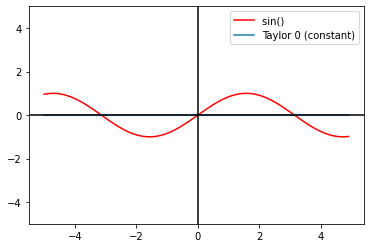

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_exp = np.sin(values)
t_exp1 = [taylor(sin(x), 0, 1).subs(x,v) for v in values]
legends = ['sin() ','Taylor 0 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)


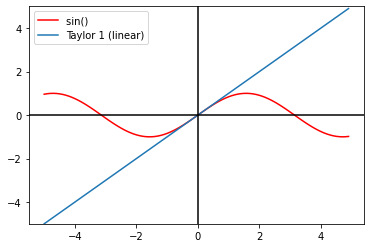

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin2 = [taylor(sin(x), 0, 2).subs(x,v) for v in values]
legends = ['sin() ','Taylor 1 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin2)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

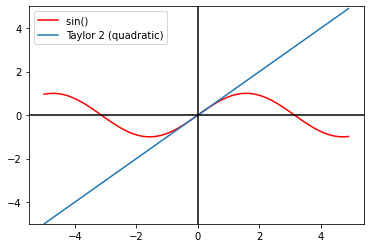

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin3 = [taylor(sin(x), 0, 3).subs(x,v) for v in values]
legends = ['sin() ','Taylor 2 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin3)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

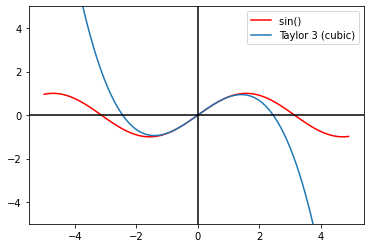

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin4 = [taylor(sin(x), 0, 4).subs(x,v) for v in values]
legends = ['sin() ','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

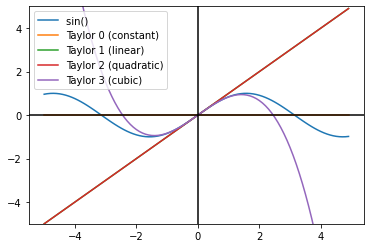

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin1 = [taylor(sin(x), 0, 1).subs(x,v) for v in values]
t_sin2 = [taylor(sin(x), 0, 2).subs(x,v) for v in values]
t_sin3 = [taylor(sin(x), 0, 3).subs(x,v) for v in values]
t_sin4 = [taylor(sin(x), 0, 4).subs(x,v) for v in values]
legends = ['sin() ','Taylor 0 (constant)','Taylor 1 (linear)','Taylor 2 (quadratic)','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin)
ax.plot(values,t_sin1)
ax.plot(values,t_sin2)
ax.plot(values,t_sin3)
ax.plot(values,t_sin4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()